# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [118]:
# Import libraries required
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [95]:
# Import data
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [96]:
# Create list of replacement names without + and -
replacement_names = [x.replace('+', "plus") for x in df.columns]
replacement_names = [x.replace('-', "to") for x in replacement_names]
replacement_names = [x.replace('®', "") for x in replacement_names]
replacement_names = [x.replace('™', "") for x in replacement_names] 
replacement_names = [x.replace('½', "half") for x in replacement_names] 
replacement_names = [x.replace('.', "") for x in replacement_names] 
replacement_names = [x.replace("'", "") for x in replacement_names]
replacement_names = [x.replace(" ", "_") for x in replacement_names]

In [97]:
#Your code here - Manipulate column names
rename_dict = dict(zip(df.columns, replacement_names))
df.rename(columns=rename_dict, inplace=True)

In [98]:
#Your code here - Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove('list_price')

In [99]:
predictors = '+'.join(x_cols)
formula = outcome+'~'+predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     726.2
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:26:19   Log-Likelihood:                -54056.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10775   BIC:                         1.090e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2821      1.551     41.435      0.000      61.241      67.323
piece_count                                         75.7184      0.776     97.605      0.000      74.198      77.239
num_reviews                                          6.4270      0.590     10.888      0.000       5.270       7.584
play_star_rating                                     5.2682      0.542      9.717      0.000       4.205       6.331
star_rating                                         -1.4380      0.617     -2.331      0.020      -2.647      -0.229
val_star_rating                                     -8.5504      0.550    -15.545      0.000      -9.628      -7.472
ages_10plus                                        122.9923      5.753     21.378      0.000     111.715     134.270
ages_10to14                                        -23.1648      7.788     -2.975      0.003     -38.430      -7.899
ages_10to16                                        -11.7969      3.528     -3.343      0.001     -18.713      -4.881
ages_10to21                                         55.9674      6.415      8.725      0.000      43.393      68.542
ages_11to16                                        -18.2277      5.058     -3.604      0.000     -28.141      -8.314
ages_12plus                                         70.5837      4.828     14.619      0.000      61.119      80.048
ages_12to16                                        -57.4333      5.882     -9.765      0.000     -68.962     -45.904
ages_14plus                                         24.6493      3.579      6.887      0.000      17.634      31.665
ages_16plus                                         32.9512      5.251      6.275      0.000      22.658      43.245
ages_1halfto3                                       -9.0486      2.087     -4.336      0.000     -13.139      -4.958
ages_1halfto5                                       -4.1380      2.605     -1.588      0.112      -9.244       0.969
ages_2to5                                           14.9724      1.459     10.260      0.000      12.112      17.833
ages_4plus                                         -18.5801      5.504     -3.376      0.001     -29.370      -7.791
ages_4to7                                           -6.1664      2.909     -2.120      0.034     -11.868      -0.465
ages_4to99                                          -3.0337      3.138     -0.967      0.334      -9.185       3.118
ages_5plus                                          -9.6179      2.705     -3.556      0.000     -14.920      -4.316
ages_5to12                                         -34.9818      2.739    -12.771      0.000     -40.351     -29.613
ages_5to8                                

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [100]:
insignificant_predictors = ['ages_1halfto5', 'ages_4to99', 'ages_5to8', 'ages_7plus', 'ages_9to16', 'theme_name_Angry_Birds', 'theme_name_Creator_3tointo1', 'theme_name_DC_Super_Hero_Girls', 'theme_name_DUPLO', 'theme_name_Elves', 'theme_name_Friends', 'theme_name_Juniors', 'theme_name_NEXO_KNIGHTS', 'theme_name_Power_Functions', 'theme_name_Pteranodon_Chase', 'theme_name_Speed_Champions', 'theme_name_Technic', 'country_AT', 'country_AU', 'country_CH', 'country_GB', 'country_IE', 'country_IT', 'review_difficulty_Very_Easy', 'review_difficulty_unknown']

In [101]:
#Your code here - Remove features which do not appear to be statistically relevant
# Remove variables with p values greater than 0.05

for i in insignificant_predictors:
    x_cols.remove(i)

In [102]:
predictors = '+'.join(x_cols)
formula = outcome+'~'+predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     898.4
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:26:19   Log-Likelihood:                -54063.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10793   BIC:                         1.088e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.7915      2.511     26.206      0.000      60.870      70.713
piece_count                                         75.7557      0.763     99.267      0.000      74.260      77.252
num_reviews                                          6.4888      0.585     11.083      0.000       5.341       7.636
play_star_rating                                     5.4221      0.531     10.206      0.000       4.381       6.463
star_rating                                         -1.4524      0.606     -2.396      0.017      -2.641      -0.264
val_star_rating                                     -8.5207      0.529    -16.099      0.000      -9.558      -7.483
ages_10plus                                        126.5677      6.930     18.264      0.000     112.984     140.151
ages_10to14                                        -20.4155      8.320     -2.454      0.014     -36.723      -4.108
ages_10to16                                         -9.6873      3.890     -2.490      0.013     -17.313      -2.062
ages_10to21                                         59.8959      7.440      8.050      0.000      45.312      74.480
ages_11to16                                        -16.4405      5.262     -3.124      0.002     -26.756      -6.126
ages_12plus                                         73.5880      6.062     12.140      0.000      61.706      85.470
ages_12to16                                        -55.0405      6.461     -8.518      0.000     -67.706     -42.375
ages_14plus                                         27.3951      4.570      5.995      0.000      18.437      36.353
ages_16plus                                         35.2212      6.171      5.708      0.000      23.126      47.317
ages_1halfto3                                       -4.6902      3.399     -1.380      0.168     -11.353       1.972
ages_2to5                                           19.0069      2.673      7.110      0.000      13.767      24.247
ages_4plus                                         -16.2103      8.435     -1.922      0.055     -32.745       0.325
ages_4to7                                           -3.5936      2.765     -1.299      0.194      -9.014       1.827
ages_5plus                                          -8.8902      2.858     -3.110      0.002     -14.493      -3.287
ages_5to12                                         -31.6687      3.125    -10.134      0.000     -37.794     -25.543
ages_6plus                                         -23.6809      5.240     -4.519      0.000     -33.953     -13.409
ages_6to12                                         -18.8801      2.615     -7.220      0.000     -24.006     -13.754
ages_6to14                               

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [103]:
#Your code here - Continue to refine the model
insignificant_predictors_2 = ['ages_1halfto3', 'ages_4plus', 'ages_4to7', 'ages_6to14', 'theme_name_Jurassic_Park_Velociraptor_Chase', 'country_FR', 'country_PT', 'review_difficulty_Easy']

In [104]:
for i in insignificant_predictors_2:
    x_cols.remove(i)

In [105]:
predictors = '+'.join(x_cols)
formula = outcome+'~'+predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1003.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:26:19   Log-Likelihood:                -54070.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10801   BIC:                         1.088e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.6758      1.215     52.404      0.000      61.294      66.058
piece_count                                         75.8262      0.763     99.417      0.000      74.331      77.321
num_reviews                                          6.1455      0.552     11.142      0.000       5.064       7.227
play_star_rating                                     5.5014      0.529     10.391      0.000       4.464       6.539
star_rating                                         -1.4314      0.601     -2.382      0.017      -2.609      -0.253
val_star_rating                                     -8.6042      0.523    -16.437      0.000      -9.630      -7.578
ages_10plus                                        129.5614      6.451     20.085      0.000     116.917     142.206
ages_10to14                                        -17.4870      8.072     -2.166      0.030     -33.309      -1.665
ages_10to16                                         -6.5432      3.331     -1.964      0.050     -13.072      -0.014
ages_10to21                                         62.8400      6.969      9.017      0.000      49.179      76.501
ages_11to16                                        -13.3548      4.886     -2.733      0.006     -22.932      -3.777
ages_12plus                                         76.6355      5.630     13.613      0.000      65.600      87.671
ages_12to16                                        -51.7495      6.165     -8.393      0.000     -63.835     -39.664
ages_14plus                                         31.2107      4.103      7.607      0.000      23.168      39.253
ages_16plus                                         38.9612      5.868      6.639      0.000      27.458      50.464
ages_2to5                                           21.9668      1.641     13.383      0.000      18.749      25.184
ages_5plus                                          -7.4825      2.645     -2.829      0.005     -12.667      -2.298
ages_5to12                                         -28.2777      2.274    -12.437      0.000     -32.734     -23.821
ages_6plus                                         -20.2011      4.793     -4.214      0.000     -29.597     -10.805
ages_6to12                                         -15.4143      1.549     -9.954      0.000     -18.450     -12.379
ages_7to12                                         -14.4029      1.845     -7.804      0.000     -18.020     -10.785
ages_7to14                                         -10.7496      1.639     -6.560      0.000     -13.962      -7.537
ages_8plus                                          19.1774      4.312      4.448      0.000      10.725      27.629
ages_8to12                               

In [106]:
x_cols.remove('country_DE')

In [107]:
predictors = '+'.join(x_cols)
formula = outcome+'~'+predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1018.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:26:19   Log-Likelihood:                -54072.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10802   BIC:                         1.088e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.9757      1.201     53.272      0.000      61.622      66.330
piece_count                                         75.8262      0.763     99.410      0.000      74.331      77.321
num_reviews                                          6.1459      0.552     11.142      0.000       5.065       7.227
play_star_rating                                     5.5016      0.529     10.390      0.000       4.464       6.539
star_rating                                         -1.4307      0.601     -2.381      0.017      -2.609      -0.253
val_star_rating                                     -8.6054      0.523    -16.438      0.000      -9.632      -7.579
ages_10plus                                        129.5896      6.451     20.088      0.000     116.944     142.235
ages_10to14                                        -17.4872      8.072     -2.166      0.030     -33.310      -1.664
ages_10to16                                         -6.5413      3.331     -1.964      0.050     -13.071      -0.012
ages_10to21                                         62.8793      6.969      9.022      0.000      49.218      76.541
ages_11to16                                        -13.3556      4.886     -2.733      0.006     -22.934      -3.777
ages_12plus                                         76.6492      5.630     13.614      0.000      65.613      87.685
ages_12to16                                        -51.7508      6.166     -8.393      0.000     -63.837     -39.664
ages_14plus                                         31.2113      4.103      7.606      0.000      23.168      39.255
ages_16plus                                         38.9621      5.869      6.639      0.000      27.458      50.466
ages_2to5                                           21.9666      1.641     13.382      0.000      18.749      25.184
ages_5plus                                          -7.4833      2.645     -2.829      0.005     -12.668      -2.299
ages_5to12                                         -28.2791      2.274    -12.437      0.000     -32.736     -23.822
ages_6plus                                         -20.2013      4.794     -4.214      0.000     -29.598     -10.805
ages_6to12                                         -15.4146      1.549     -9.953      0.000     -18.450     -12.379
ages_7to12                                         -14.4034      1.846     -7.804      0.000     -18.021     -10.786
ages_7to14                                         -10.7516      1.639     -6.560      0.000     -13.964      -7.539
ages_8plus                                          19.1935      4.312      4.451      0.000      10.741      27.646
ages_8to12                               

In [108]:
x_cols.remove('country_ES')
predictors = '+'.join(x_cols)
formula = outcome+'~'+predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1033.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:26:20   Log-Likelihood:                -54073.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10803   BIC:                         1.088e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2163      1.189     53.990      0.000      61.885      66.548
piece_count                                         75.8262      0.763     99.405      0.000      74.331      77.321
num_reviews                                          6.1462      0.552     11.142      0.000       5.065       7.228
play_star_rating                                     5.5017      0.530     10.390      0.000       4.464       6.540
star_rating                                         -1.4302      0.601     -2.380      0.017      -2.608      -0.252
val_star_rating                                     -8.6063      0.524    -16.439      0.000      -9.633      -7.580
ages_10plus                                        129.6122      6.452     20.090      0.000     116.966     142.258
ages_10to14                                        -17.4873      8.073     -2.166      0.030     -33.311      -1.663
ages_10to16                                         -6.5398      3.331     -1.963      0.050     -13.070      -0.010
ages_10to21                                         62.9109      6.970      9.026      0.000      49.249      76.573
ages_11to16                                        -13.3562      4.887     -2.733      0.006     -22.935      -3.777
ages_12plus                                         76.6602      5.630     13.615      0.000      65.624      87.697
ages_12to16                                        -51.7518      6.166     -8.393      0.000     -63.839     -39.665
ages_14plus                                         31.2117      4.104      7.606      0.000      23.168      39.255
ages_16plus                                         38.9628      5.869      6.639      0.000      27.458      50.467
ages_2to5                                           21.9664      1.642     13.381      0.000      18.749      25.184
ages_5plus                                          -7.4839      2.645     -2.829      0.005     -12.669      -2.299
ages_5to12                                         -28.2803      2.274    -12.437      0.000     -32.738     -23.823
ages_6plus                                         -20.2015      4.794     -4.214      0.000     -29.598     -10.805
ages_6to12                                         -15.4149      1.549     -9.953      0.000     -18.451     -12.379
ages_7to12                                         -14.4037      1.846     -7.804      0.000     -18.022     -10.786
ages_7to14                                         -10.7532      1.639     -6.561      0.000     -13.966      -7.541
ages_8plus                                          19.2065      4.312      4.454      0.000      10.754      27.660
ages_8to12                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [109]:
#Your code here - Code a way to identify multicollinearity
remaining_df = df[x_cols]

In [110]:
vif = [variance_inflation_factor(remaining_df.values, i) for i in range(remaining_df.shape[1])]
list(zip(x_cols,vif))

[('piece_count', 4.578063550913723),
 ('num_reviews', 2.6180989035471085),
 ('play_star_rating', 2.451481370411722),
 ('star_rating', 3.1832749450169175),
 ('val_star_rating', 2.4138844926118015),
 ('ages_10plus', 17.833873078980663),
 ('ages_10to14', 1.1022655820328722),
 ('ages_10to16', 1.1846841630256013),
 ('ages_10to21', 7.171979745921298),
 ('ages_11to16', 1.161610388590882),
 ('ages_12plus', 7.263292755942368),
 ('ages_12to16', 1.2035298760114392),
 ('ages_14plus', 2.2590732769512085),
 ('ages_16plus', 9.594625029519635),
 ('ages_2to5', 1.2015613386924897),
 ('ages_5plus', inf),
 ('ages_5to12', 3.2489930663792923),
 ('ages_6plus', 2.669631408139454),
 ('ages_6to12', 1.957798199651117),
 ('ages_7to12', 1.4991280482427864),
 ('ages_7to14', 1.9680047349887706),
 ('ages_8plus', 3.3417674245389626),
 ('ages_8to12', 1.2808482360016267),
 ('ages_8to14', 2.0605320147296333),
 ('ages_9plus', 1.556404477439243),
 ('ages_9to12', 1.0204364828458525),
 ('ages_9to14', 1.945831037176449),
 ('t

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [111]:
#Your code here - Subset features based on multicollinearity
vif_scores = list(zip(x_cols,vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

67 58


In [113]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1044.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        09:27:40   Log-Likelihood:                -54630.
No. Observations:               10870   AIC:                         1.094e+05
Df Residuals:                   10811   BIC:                         1.098e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           70.7390      0.962     73.569      0.000      68.854      72.624
piece_count                                         77.5321      0.603    128.558      0.000      76.350      78.714
num_reviews                                          4.4630      0.539      8.284      0.000       3.407       5.519
play_star_rating                                     7.6308      0.481     15.879      0.000       6.689       8.573
star_rating                                         -2.6298      0.610     -4.310      0.000      -3.826      -1.434
val_star_rating                                     -9.8438      0.544    -18.107      0.000     -10.909      -8.778
ages_10to14                                        -37.4298      8.410     -4.450      0.000     -53.916     -20.944
ages_10to16                                        -17.4729      3.255     -5.369      0.000     -23.853     -11.093
ages_11to16                                        -27.7476      4.795     -5.787      0.000     -37.147     -18.348
ages_12to16                                        -67.6518      6.044    -11.193      0.000     -79.500     -55.804
ages_14plus                                          6.2966      3.458      1.821      0.069      -0.482      13.075
ages_2to5                                           15.6989      1.577      9.956      0.000      12.608      18.790
ages_5to12                                         -36.2117      2.308    -15.690      0.000     -40.736     -31.688
ages_6plus                                         -28.1575      4.987     -5.646      0.000     -37.933     -18.382
ages_6to12                                         -24.8503      1.453    -17.102      0.000     -27.699     -22.002
ages_7to12                                         -23.0138      1.799    -12.793      0.000     -26.540     -19.488
ages_7to14                                         -19.4620      1.574    -12.361      0.000     -22.548     -16.376
ages_8plus                                          -1.1471      3.897     -0.294      0.768      -8.786       6.492
ages_8to12                                         -22.2456      2.281     -9.751      0.000     -26.718     -17.774
ages_8to14                                         -20.4034      1.656    -12.319      0.000     -23.650     -17.157
ages_9plus                                          16.7122      8.998      1.857      0.063      -0.926      34.350
ages_9to12                                         -32.5329      5.669     -5.738      0.000     -43.646     -21.420
ages_9to14                                         -18.3792      2.266     -8.112      0.000     -22.820     -13.938
theme_name_BOOST                         

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

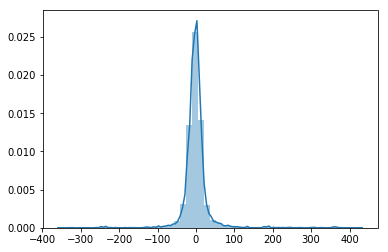

In [115]:
# Your code here - Check that the residuals are normally distributed
sns.distplot(model.resid)

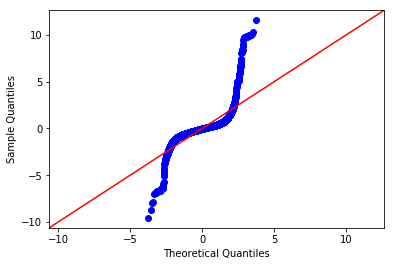

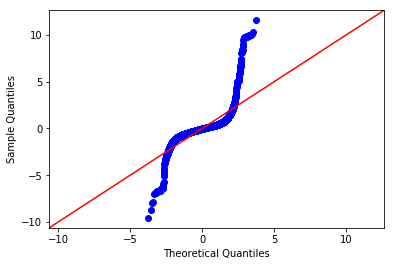

In [126]:
sm.graphics.qqplot(model.resid, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

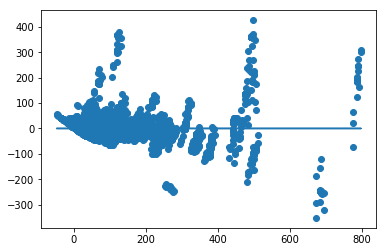

In [129]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [134]:
#Your code here - Check for outliers
outliers = df[df['list_price']<=250].index
df_outliers_removed = df.drop(outliers)

In [136]:
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df_outliers_removed).fit()
model.summary()

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     144.0
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          5.89e-205
Time:                        09:46:25   Log-Likelihood:                -2390.0
No. Observations:                 444   AIC:                             4850.
Df Residuals:                     409   BIC:                             4993.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          261.2021     46.313      5.640      0.000     170.160     352.244
piece_count                                         70.4751      3.162     22.288      0.000      64.259      76.691
num_reviews                                          1.8811      3.081      0.611      0.542      -4.175       7.937
play_star_rating                                   -42.8892      5.887     -7.285      0.000     -54.462     -31.316
star_rating                                        119.7265     17.869      6.700      0.000      84.600     154.853
val_star_rating                                   -270.4994     11.756    -23.009      0.000    -293.609    -247.389
ages_10to14                                       3.889e-12   1.31e-12      2.970      0.003    1.31e-12    6.46e-12
ages_10to16                                      -4.473e-13   2.55e-13     -1.758      0.080   -9.48e-13     5.3e-14
ages_11to16                                       -355.9861     29.494    -12.070      0.000    -413.965    -298.007
ages_12to16                                        -80.9907     18.553     -4.365      0.000    -117.462     -44.519
ages_14plus                                       -148.6281     21.922     -6.780      0.000    -191.723    -105.534
ages_2to5                                          2.33e-13   1.19e-13      1.961      0.051   -5.51e-16    4.67e-13
ages_5to12                                       -1.052e-13   1.67e-13     -0.630      0.529   -4.33e-13    2.23e-13
ages_6plus                                          39.6080     17.854      2.218      0.027       4.511      74.705
ages_6to12                                          -8.7851     21.694     -0.405      0.686     -51.431      33.860
ages_7to12                                        -2.53e-14   2.74e-14     -0.923      0.357   -7.92e-14    2.86e-14
ages_7to14                                        4.557e-14   4.03e-14      1.130      0.259   -3.37e-14    1.25e-13
ages_8plus                                        2.102e-14   2.54e-14      0.826      0.409    -2.9e-14     7.1e-14
ages_8to12                                        3.899e-14   9.75e-15      3.998      0.000    1.98e-14    5.82e-14
ages_8to14                                        7.587e-14   2.37e-14      3.205      0.001    2.93e-14    1.22e-13
ages_9plus                                        9.106e-14   1.01e-14      9.047      0.000    7.13e-14    1.11e-13
ages_9to12                                       -2.111e-14   1.02e-14     -2.062      0.040   -4.12e-14    -9.9e-16
ages_9to14                                        -127.8871     67.140     -1.905      0.058    -259.869       4.095
theme_name_BOOST                         

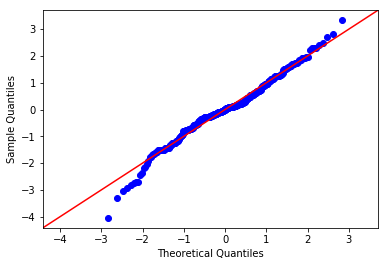

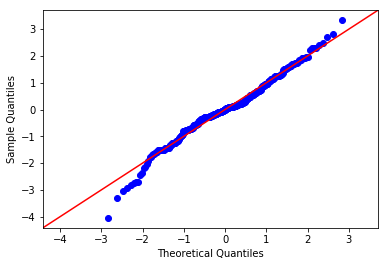

In [137]:
sm.graphics.qqplot(model.resid, line='45', fit=True)

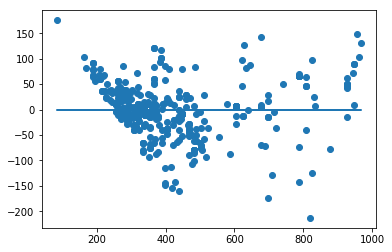

In [139]:
plt.scatter(model.predict(df_outliers_removed[x_cols]), model.resid)
plt.plot(model.predict(df_outliers_removed[x_cols]), [0 for i in range(len(df_outliers_removed))])

In [ ]:
#Your code here - Check normality and homoscedasticity assumptions

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 